In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

A07.1 - Correlation MSTs

Task: Build MSTs from correlations and analyze them

+ from the correlation matrices, build the Minimum Spanning Trees (see lecture)

+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the nodes and calculate the degrees

+ compare the MST degree distributions of the 1 hour, 1 minute, Normal and One-Factor correlations

In [98]:
# Load data
cormats = []

cormats.append(np.load('./data/cormat_1h.npy'))
cormats.append(np.load('./data/cormat_1m.npy'))
cormats.append(np.load('./data/cormat_gaussian_1h.npy'))
cormats.append(np.load('./data/cormat_gaussian_1m.npy'))
cormats.append(np.load('./data/cormat_onefactor_1h.npy'))
cormats.append(np.load('./data/cormat_onefactor_1m.npy'))

stocknames = {}
doc = open('./data/stocknames.txt', 'r').read().splitlines()

for i in range(len(doc)):
    stocknames[i] = doc[i]

#print(stocknames)

In [99]:
eigvals = []
eigvac = []
msts = []

#from the correlation matrices, build the Minimum Spanning Trees (see lecture)
for cormat in cormats:
    eigval, eigvec = np.linalg.eig(cormat)
    eigvals.append(eigval)
    eigvac.append(eigvac)

    # Turn correlation to distance
    distance = np.sqrt(2 * (1 - cormat))
    graph = nx.from_numpy_matrix(distance)
    # Set atrributes
    nx.set_node_attributes(graph, stocknames, 'ticker')
    nx.get_node_attributes(graph, 'ticker')

    mst = nx.minimum_spanning_tree(graph, weight='weight')
    msts.append(mst)

In [100]:
# Calculate degrees 
mst_degree = []
measurements = []
count = 0

for mst in msts:
    degree = mst.degree()
    degrees = [degree[i] for i in mst.nodes()]
    ndegrees = np.unique(np.array([ degree[i] for i in mst.nodes() ]))
    mst_degree.append(ndegrees)

    for i in ndegrees:
        measurements.append([])
        measurements[count].append(degrees.count(i)/len(degrees))
    
    count= count + 1


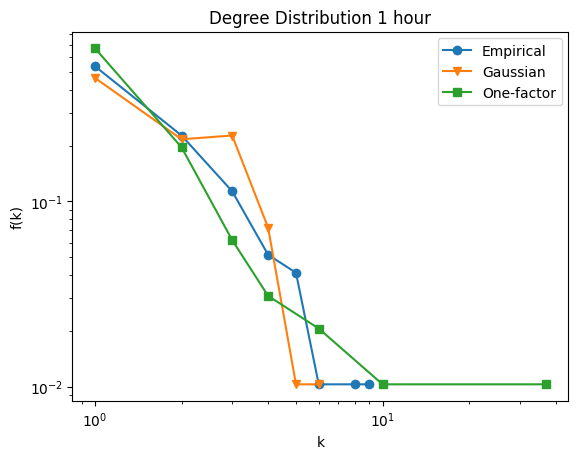

In [101]:
# Compare deg distributions REFER to Lec 8 - Page 28

plt.plot(mst_degree[0],measurements[0], marker='o', label="Empirical")
plt.plot(mst_degree[2],measurements[2], marker='v', label="Gaussian")
plt.plot(mst_degree[4],measurements[4], marker='s', label="One-factor")
plt.title("Degree Distribution 1 hour")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

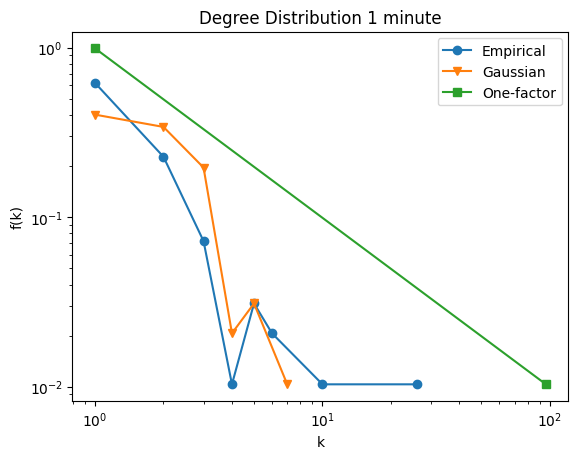

In [102]:
plt.plot(mst_degree[1],measurements[1], marker='o', label="Empirical")
plt.plot(mst_degree[3],measurements[3], marker='v', label="Gaussian")
plt.plot(mst_degree[5],measurements[5], marker='s', label="One-factor")
plt.title("Degree Distribution 1 minute")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

A07.2 - Conclusions
Task: finish the analysis by drawing conclusions Answer the following questions (for both timescales):

1. Is there a ‘market mode’?

Yes. From two plots below, clearly there exists a largest 𝜆1 among all for both timescales (around 1.6 for 1h and 1.25 for 1m).

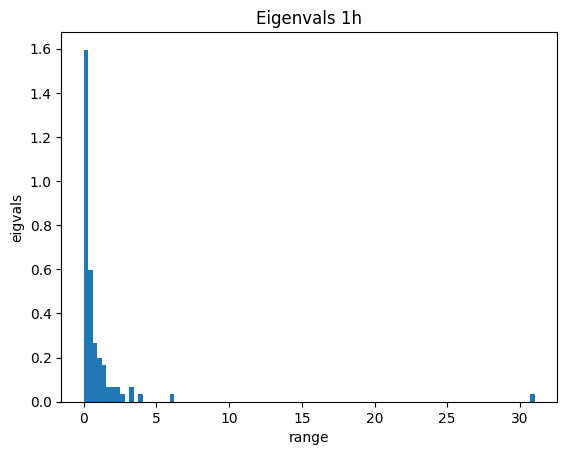

In [112]:
_ = plt.hist(eigvals[0], bins = 100, density = True)
plt.title("Eigenvals 1h")
plt.xlabel("range")
plt.ylabel("eigvals")
plt.show()

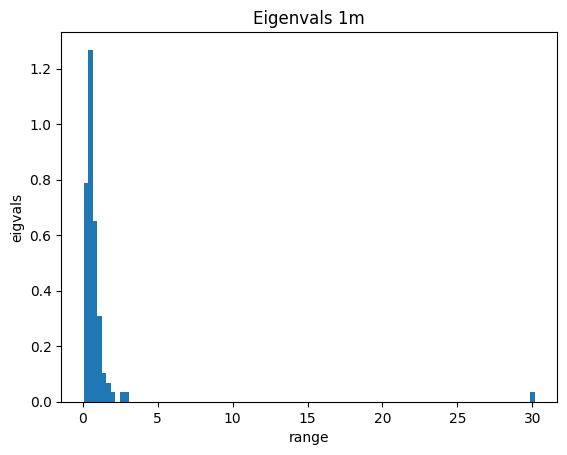

In [113]:
_ = plt.hist(eigvals[1], bins = 100, density = True)
plt.title("Eigenvals 1m")
plt.xlabel("range")
plt.ylabel("eigvals")
plt.show()

2. Which are the 5 stocks with highest degree on the 1 minute and 1 hour MST?


3. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?

4. Is the degree distribution of MSTs well reproduced by the null Gaussian and One-Factor models?